In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
infl = pd.read_csv("inflation.csv",index_col=0)
zp = pd.read_csv('zp.csv')

In [3]:
zp

,Вид экономической деятельности,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Добыча полезных ископаемых,5940,9099,11081,13912,16842,19727,23145,28108,33206,...,58959,63695,69936,74474,83178,89344,95359,103474,118376,130826
1,Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54263
2,Финансовая деятельность,5232,8885,13246,15561,17384,22464,27886,34880,41872,...,68565,70088,80289,84904,91070,103668,112680,130223,146637,169106


У нас есть данные по средней зарплате за 2000-2023 годы в 3х разных видах деятельности

In [41]:
years = np.arange(2000,2024)
zp = zp.set_index('Вид экономической деятельности')
zp.columns = years
zp.to_csv('zarplata.csv')

Построим графики роста зарплат для всех видов деятельности

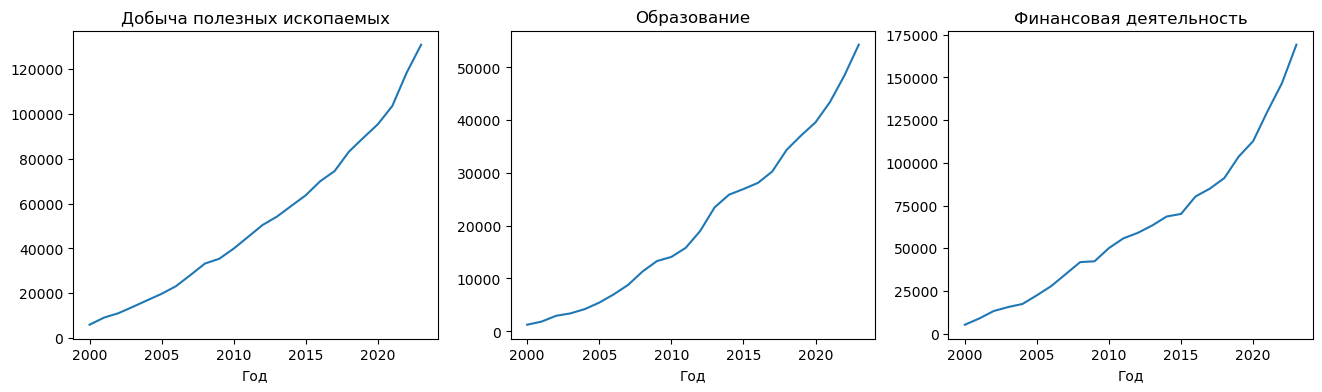

In [9]:
plt.figure(figsize= (16,4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.lineplot(x = zp.columns, y = zp.iloc[i])
    plt.title(zp.index[i])
    plt.xlabel('Год')
    plt.ylabel('')

Видим практически линейный рост на всех графиках.
Посчитаем во сколько раз выросла зарплата в каждом из видов деятельностей за эти годы

In [10]:
for i in range(3):
    up = zp.iloc[i,-1] / zp.iloc[i,-0]
    print(f'{zp.index[i]} рост в {up:.1f} раз')

Добыча полезных ископаемых рост в 22.0 раз
Образование рост в 43.8 раз
Финансовая деятельность рост в 32.3 раз


Рассматривать такие цифры роста зарплаты не совсем правильно, т.к мы не учитываем инфляцию за все эти годы. Исправим это

In [11]:
infl.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"160,40","160,40"
1,1992,"746,67","1 014,89","1 262,41","914,10","1 001,73","1 196,60","1 325,49","1 440,38","1 598,83","1 917,26","2 235,88","2 508,85","2 508,85"
2,1993,"850,46","758,85","694,06","674,49","717,40","722,89","810,61","956,51","1 065,47","1 033,23","945,97","839,87","839,87"
3,1994,"780,85","682,80","600,09","539,87","479,24","412,09","340,71","265,93","221,19","209,09","204,36","215,02","215,02"
4,1995,"214,68","215,24","219,73","219,68","222,73","224,73","224,89","224,70","214,18","186,09","161,00","131,33","131,33"


In [31]:
# оставим только итоговые данные по годам, начиная с 2000
infl = infl.iloc[-24:][['Год','Всего']].reset_index(drop = True)

In [32]:
infl

,Год,Всего
0,2000,"20,20"
1,2001,"18,58"
2,2002,"15,06"
3,2003,"11,99"
4,2004,"11,74"
5,2005,"10,91"
6,2006,"9,00"
7,2007,"11,87"
8,2008,"13,28"
9,2009,"8,80"


In [33]:
# Приведем данные инфляции к числовому типу
infl['Всего'] = infl['Всего'].str.replace(',', '.').astype('float')

Посчитаем сколько составила инфляция за все годы

In [15]:
inf = infl['Всего'].values
inf_total = [inf[0]]
for i in range(1, len(inf)):
    new_inf = inf_total[-1] + inf[i] + (inf_total[-1] * inf[i] / 100)
    inf_total.append(new_inf)

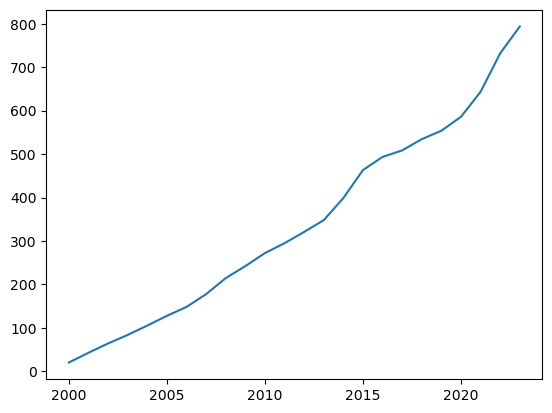

In [16]:
sns.lineplot(x = years, y = inf_total);

Инфляция составила 793 пункта, что равняется увеличению цен почти в 8 раз

### Найдем реальную зарплату, для чего из текущей зарплаты вычтем часть зарплаты, вызванную инфляцией

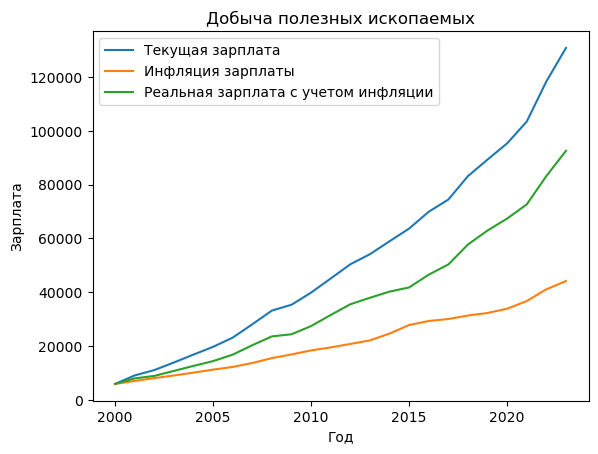

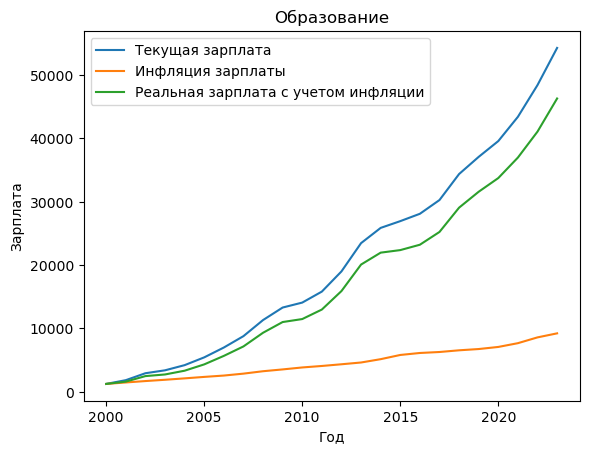

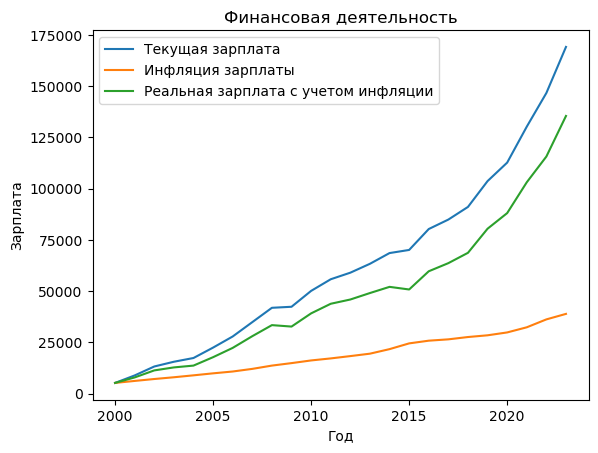

In [46]:
inf = infl['Всего'].values
for i in range(3):

    zpl = zp.iloc[i,0]
    zp_inf = [zpl]
    for j in range(1, len(inf)):
        zpl = zpl * (1 + inf[j] / 100)
        zp_inf.append(zpl)
    zp_final = [zp.iloc[i,x] - zp_inf[x] + zp.iloc[i,0] for x in range(len(inf))]

    sns.lineplot(x = zp.columns, y = zp.iloc[i], label='Текущая зарплата')
    sns.lineplot(x = zp.columns, y = zp_inf, label='Инфляция зарплаты')
    sns.lineplot(x = zp.columns, y = zp_final, label='Реальная зарплата с учетом инфляции')
    plt.xlabel('Год')
    plt.ylabel('Зарплата')
    plt.title(zp.index[i])
    plt.legend()
    plt.show()

Из графиков видно, что динамика роста зарплат с 2000 года лучше всего в сфере образования, но средняя зарплата все еще находится на невысоком уровне. Можно сказать, что лучше всего ситуация в финансовой деятельности, самые высокие зарплаты и при этом так же хорошая динамика роста. Сфера добычи полезных ископаемых имеет худшую динамику из представленных, при изначальном равенстве зарплат с финансовой деятельностью, за рассматриваемые годы уже сложилось отставание почти в  40000 рублей.

#### Посмотрим динамику роста зарплат по годам и сравним ее с инфляцией за эти годы

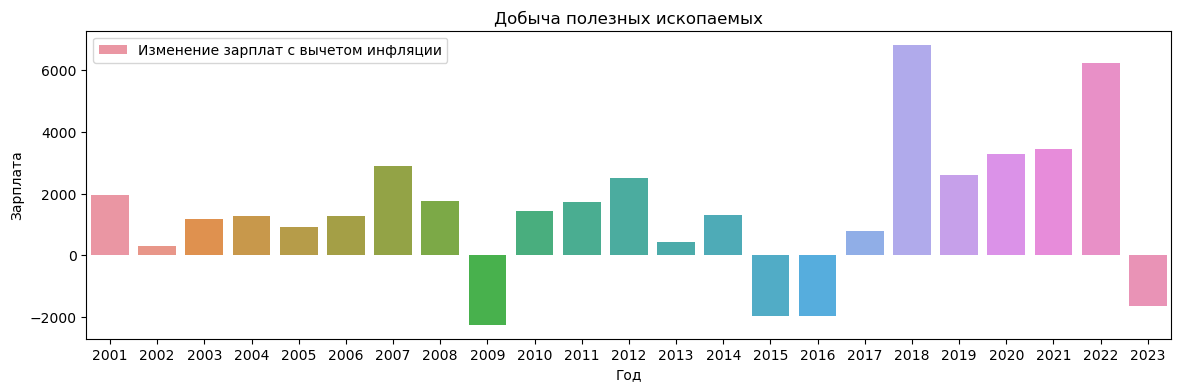

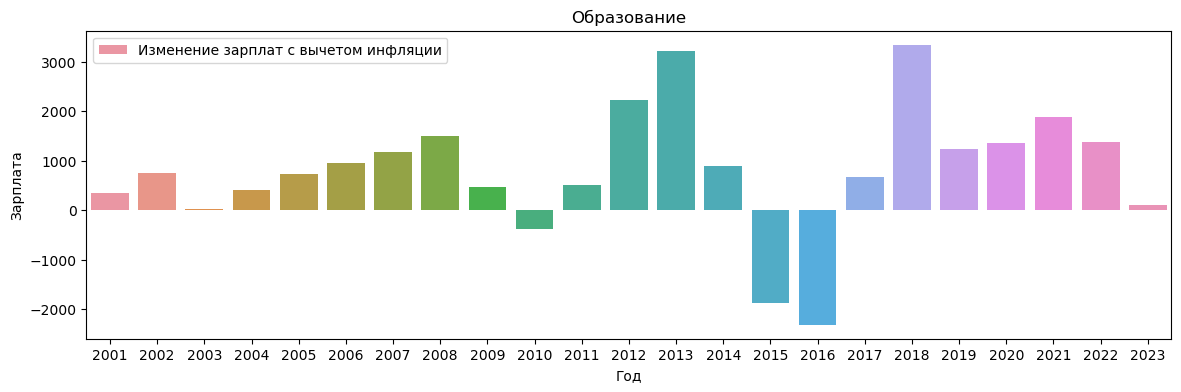

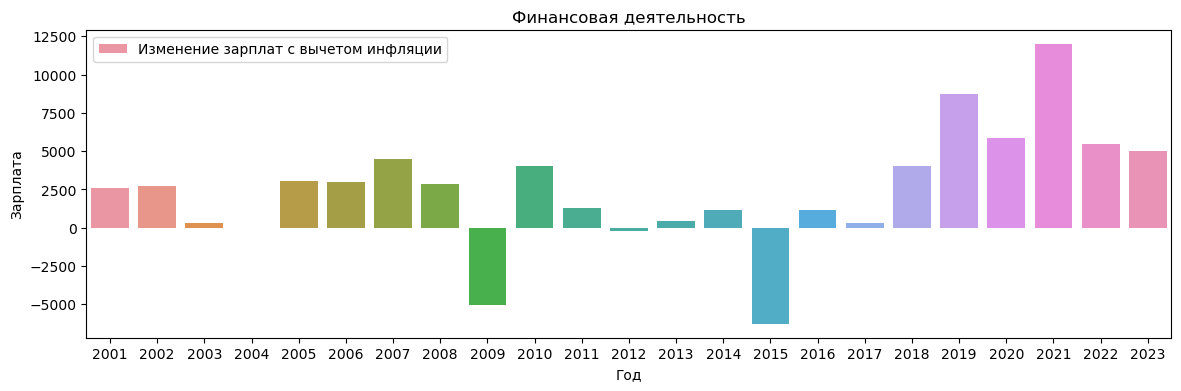

In [56]:
for j in range(3):
    
    dif_inf = []
    for i in range(len(inf) - 1):
        zpl = zp.iloc[j,i+1]
        zp_inf = zp.iloc[j,i] * (1 + inf[i]/100)
        res = zpl - zp_inf
        dif_inf.append(res)
    
    plt.figure(figsize= (14,4))
    sns.barplot(x = years[1:], y = dif_inf, label='Изменение зарплат с вычетом инфляции')
    plt.xlabel('Год')
    plt.ylabel('Зарплата')
    plt.title(zp.index[j])
    plt.legend()
    plt.show()

Для всех видов деятельности видим 2 выраженных участка падения зарплат: 2009(2010) и 2015-2016 годы. Это объясняется последствиями экономических кризисов 2